# 1. Importation des données et bibliothèques nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import itertools
%matplotlib inline

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


vin = pd.read_excel('C:/Users/Simplice/Documents/dataset_simpliceMatariLungungu.xlsx')

In [2]:
#Affichage de données
data=pd.DataFrame(vin)
data

,ID_individu,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 2. Affichage des caractéristiques statistiques des données

In [3]:
print(data.describe())

       ID_individu  fixed_acidity  volatile_acidity  citric_acid  \
count  6497.000000    6497.000000       6497.000000  6497.000000   
mean   2042.535632       7.215307          0.339666     0.318633   
std    1436.926393       1.296434          0.164636     0.145318   
min       0.000000       3.800000          0.080000     0.000000   
25%     812.000000       6.400000          0.230000     0.250000   
50%    1649.000000       7.000000          0.290000     0.310000   
75%    3273.000000       7.700000          0.400000     0.390000   
max    4897.000000      15.900000          1.580000     1.660000   

       residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
count     6497.000000  6497.000000          6497.000000           6497.000000   
mean         5.443235     0.056034            30.525319            115.744574   
std          4.757804     0.035034            17.749400             56.521855   
min          0.600000     0.009000             1.000000        

# 3. Segmentation de l'ensemble de données en 10 classes à l'aide de K-means

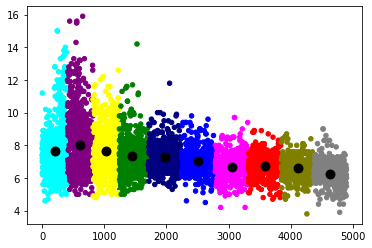

None
[[3.58350000e+03 6.70867925e+00 2.74462264e-01 3.04000000e-01
  6.69443396e+00 4.23245283e-02 3.57556604e+01 1.30833962e+02
  9.93307000e-01 3.14926415e+00 4.87811321e-01 1.09515094e+01
  6.03018868e+00]
 [1.44729152e+03 7.32317802e+00 3.97395460e-01 3.29330944e-01
  4.24868578e+00 6.13464755e-02 2.69169654e+01 1.02047790e+02
  9.94966774e-01 3.26443250e+00 5.37228196e-01 1.05310036e+01
  5.74432497e+00]
 [2.51400000e+03 7.00951941e+00 2.82190388e-01 3.11312384e-01
  6.72892791e+00 4.66580407e-02 3.61025878e+01 1.47561922e+02
  9.94724991e-01 3.21822551e+00 5.15822551e-01 1.02336414e+01
  5.77264325e+00]
 [6.10252132e+02 8.03885505e+00 4.09470158e-01 3.33861145e-01
  4.71169306e+00 6.87235079e-02 2.54506699e+01 9.78897686e+01
  9.96282887e-01 3.23764921e+00 5.78684531e-01 1.01803898e+01
  5.70401949e+00]
 [4.63600000e+03 6.26902486e+00 2.97944551e-01 3.09349904e-01
  6.09512428e+00 4.41242830e-02 3.43652008e+01 1.28326004e+02
  9.93016453e-01 3.19407266e+00 4.96386233e-01 1.089101

In [4]:
kmeans= KMeans(n_clusters=10)
kmeans.fit(vin)
colors= np.array(['red','green','blue','purple','gray','fuchsia','navy','olive','yellow','aqua'])
plt.scatter(vin.ID_individu,vin.fixed_acidity,c=colors[kmeans.labels_],s=20)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_ [:,1],c='black',s=80)
print(plt.show())

print(kmeans.cluster_centers_)

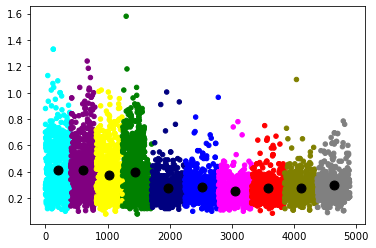

None
143575623.74218667


In [5]:
colors= np.array(['red','green','blue','purple','gray','fuchsia','navy','olive','yellow','aqua'])
plt.scatter(vin.ID_individu,vin.volatile_acidity,c=colors[kmeans.labels_],s=20)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_ [:,2],c='black',s=80)
print(plt.show())

print(kmeans.inertia_)

# 5. Représentation graphique des classes dans un graphique bidimensionnel

En utilisant l'Analyse à Composante Principale pour la réduction de la dimensionnalité)

In [6]:
kmeans.labels_

array([9, 9, 9, ..., 1, 1, 1])

In [7]:
from sklearn.decomposition import PCA

#Creation du modèle
modele = PCA(n_components=2)

#Creation des données réduites
x_reduced=modele.fit_transform(vin)

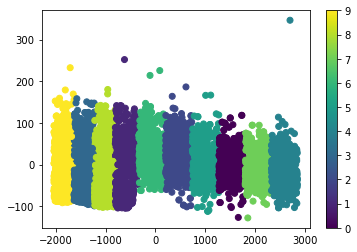

In [8]:
#Visualisation de données dans un especes 2D (où c = le nombre de couleurs definies)
plt.scatter(x_reduced[:,0],x_reduced[:,1], c=kmeans.labels_)
plt.colorbar()

In [9]:
#Visualisation des axes principaux
modele.components_

array([[ 9.99947025e-01, -3.54398206e-04, -3.69520306e-05,
        -1.63121534e-06,  5.86662666e-04, -7.00805179e-06,
         2.83171996e-03,  9.87051120e-03, -7.28410315e-07,
        -2.60892399e-05, -2.55489380e-05,  1.63531699e-04,
         5.51467474e-05],
       [-1.02715194e-02, -5.53450007e-03, -1.01744990e-03,
         5.31507170e-04,  3.98985101e-02, -1.32681933e-04,
         2.27198674e-01,  9.72934682e-01,  6.79233179e-06,
        -5.25444462e-04, -5.81170843e-04, -6.92858046e-03,
        -9.42003741e-04]])

# 7. Séparation l’ensemble de données résultant (de la segmentation) en données d’apprentissage et en données de test en utilisant les méthodes suivantes pour la construction des modèles prédictifs :

    - La régression logistique
    - Le réseau de neurones
    - L’arbre de décision (avec la méthode CART)
    - L’arbre de décision (avec la méthode ID3)
    - La méthode de 𝑘 plus proches voisins.

<h3>Arbre de décision</h3>

In [10]:
#Importation de bibliotheque pour faire de l'arbre de décision

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from sklearn import tree

In [11]:
#Ajouter les données de test et d'apprentissage dans des variables

x=pd.DataFrame(vin,columns=['ID_individu','fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol'])
print(x)

y=pd.DataFrame(vin,columns=['quality'])
print(y)

      ID_individu  fixed_acidity  volatile_acidity  citric_acid  \
0               0            7.0             0.270         0.36   
1               1            6.3             0.300         0.34   
2               2            8.1             0.280         0.40   
3               3            7.2             0.230         0.32   
4               4            7.2             0.230         0.32   
...           ...            ...               ...          ...   
6492         1594            6.2             0.600         0.08   
6493         1595            5.9             0.550         0.10   
6494         1596            6.3             0.510         0.13   
6495         1597            5.9             0.645         0.12   
6496         1598            6.0             0.310         0.47   

      residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
0               20.7      0.045                 45.0                 170.0   
1                1.6      0.049        

In [12]:
#Séparation du dataset en deux parties (partie test et partie apprentissage)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=3)

In [13]:
#Lancement du modèle de prediction en utilisant l'indice de GINI

vinsTree=DecisionTreeClassifier(criterion="gini",max_depth=8)
vinsTree.fit(x_train,y_train)
predTree=vinsTree.predict(x_test)
print(predTree[0:200])
print(y_test[0:200])

print("Taux du succès de notre modèle d'arbre de décision est", metrics.accuracy_score(y_test,predTree))

[5 7 6 6 7 5 7 7 6 6 6 6 5 6 5 6 6 6 5 6 7 5 6 6 5 6 5 5 5 6 5 5 5 5 5 6 6
 6 6 5 5 6 6 6 7 5 6 5 6 5 6 5 6 7 6 6 6 5 6 6 6 5 6 7 6 6 5 6 7 7 6 6 5 5
 8 6 5 5 7 6 7 5 6 6 5 6 6 5 6 7 6 5 6 5 6 5 7 5 6 6 6 7 6 5 6 5 6 6 5 5 6
 5 6 7 5 6 5 6 6 6 6 6 5 6 5 7 5 5 5 6 7 5 6 6 5 5 5 5 5 6 5 7 6 6 6 5 5 5
 7 6 5 6 5 6 7 5 6 5 6 5 6 6 6 5 5 6 6 7 6 5 5 6 6 5 6 6 7 5 6 5 5 6 5 6 5
 6 6 5 7 6 6 6 6 5 7 6 6 5 7 6]
      quality
6245        5
486         6
273         5
1993        6
885         7
...       ...
3153        6
4239        7
5761        5
3133        6
5055        5

[200 rows x 1 columns]
Taux du succès de notre modèle d'arbre de décision est 0.5361538461538462


In [14]:
#Lancement du modèle de prédiction en utilisant l'indice d'ENTROPY

vinsTree=DecisionTreeClassifier(criterion="entropy",max_depth=8)
vinsTree.fit(x_train,y_train)
predTree=vinsTree.predict(x_test)
print(predTree[0:200])
print(y_test[0:200])

print("Taux du succès de notre modèle d'arbre de décision est", metrics.accuracy_score(y_test,predTree))

[5 6 5 6 6 6 6 6 6 6 7 6 5 5 5 6 7 6 6 6 7 6 6 6 6 6 5 6 5 7 5 5 5 6 5 6 6
 6 6 5 5 6 6 5 7 5 6 5 6 5 6 5 7 7 5 6 7 6 7 6 6 5 7 7 6 6 5 8 8 6 6 6 5 5
 8 6 5 6 6 6 5 6 6 6 5 6 6 5 6 7 5 5 4 5 7 5 6 5 6 5 7 8 6 5 6 5 6 6 5 5 6
 5 6 6 5 6 6 6 7 6 6 5 5 5 5 7 6 5 5 5 7 5 7 6 5 6 5 5 5 6 5 4 6 6 6 5 5 5
 6 5 5 6 5 6 7 5 6 5 6 6 6 5 6 5 5 6 7 5 4 5 6 6 6 5 6 6 7 6 7 6 5 5 5 5 5
 6 6 5 8 6 5 7 6 5 6 7 6 5 7 5]
      quality
6245        5
486         6
273         5
1993        6
885         7
...       ...
3153        6
4239        7
5761        5
3133        6
5055        5

[200 rows x 1 columns]
Taux du succès de notre modèle d'arbre de décision est 0.5430769230769231


Index(['ID_individu', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')
[[  0   0   1   3   2   0   0]
 [  0   2  27  19   1   1   0]
 [  0   5 277 146   9   3   0]
 [  0   3 134 350  61   3   0]
 [  0   1  12 116  68  10   0]
 [  0   0   0  23  12   9   0]
 [  0   0   0   1   1   0   0]]


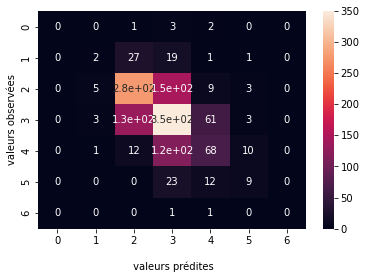

In [15]:
#Génération de la matrice de confusion

featureNames=x.columns
print(featureNames)
from sklearn import metrics 
print(metrics.confusion_matrix(y_test,predTree))

import pylab as pl
import seaborn as sns
labels=['1','2','3','4','5','6','7','8','9','10']
ax=plt.subplot(111)
sns.heatmap(metrics.confusion_matrix(y_test,predTree),annot=True,ax=ax);
plt.ylabel("valeurs observées")
plt.xlabel("\n valeurs prédites")
plt.show()

<h3>Régression logistique</h3>

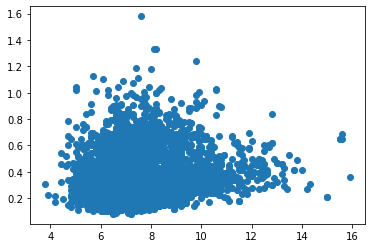

In [16]:
#Afficher le dataset
plt.scatter(vin.fixed_acidity, vin.volatile_acidity)

In [17]:
#Division du dataset en deux parties : partie test et apprentissage

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=3)

In [18]:
#Mise en echelle des données Test et Entrainement

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_test

array([[-0.47999491, -0.01321709,  1.92299282, ...,  0.75775128,
        -0.94816229, -0.82770763],
       [-1.08211052, -0.94723509, -1.0957551 , ...,  1.50408568,
        -0.14692661, -0.65990233],
       [-1.23106595, -0.48022609,  1.46560677, ...,  0.13580596,
        -1.01493193, -1.24722087],
       ...,
       [-0.3681035 ,  0.4537919 , -0.48590704, ...,  0.01141689,
         0.72107871, -0.40819438],
       [ 1.89979538, -0.94723509, -1.21772471, ...,  0.63336222,
        -0.61431409,  0.59863741],
       [ 0.01372591,  1.07647057,  0.88625111, ..., -1.2946683 ,
        -1.01493193,  1.6054692 ]])

In [19]:
#Construction du modèle

classifier=LogisticRegression(random_state=0,solver='liblinear')
classifier.fit(x_train, y_train)

c:\Users\Simplice\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [20]:
#Faire une nouvelle prediction

y_pred=classifier.predict(x_test)
classifier.score(x_test,y_test)

print("Taux du succès de notre modèle de regression logistique est", classifier.score(x_test,y_test))

Taux du succès de notre modèle de regression logistique est 0.5392307692307692


In [21]:
#La matrice de confusion

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[  0   0   2   3   1   0   0]
 [  0   0  28  22   0   0   0]
 [  0   0 260 178   2   0   0]
 [  0   0 132 402  17   0   0]
 [  0   0  18 150  39   0   0]
 [  0   0   2  28  14   0   0]
 [  0   0   0   0   2   0   0]]


<h3> La méthode de 𝑘 plus proches voisins </h3>

In [22]:
#Visualisation
vin['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [23]:
#Ajouter les données de test et d'apprentissage dans des variables
x=pd.DataFrame(vin,columns=['ID_individu','fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol'])
print(x)

y=pd.DataFrame(vin,columns=['quality'])
print(y)

      ID_individu  fixed_acidity  volatile_acidity  citric_acid  \
0               0            7.0             0.270         0.36   
1               1            6.3             0.300         0.34   
2               2            8.1             0.280         0.40   
3               3            7.2             0.230         0.32   
4               4            7.2             0.230         0.32   
...           ...            ...               ...          ...   
6492         1594            6.2             0.600         0.08   
6493         1595            5.9             0.550         0.10   
6494         1596            6.3             0.510         0.13   
6495         1597            5.9             0.645         0.12   
6496         1598            6.0             0.310         0.47   

      residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
0               20.7      0.045                 45.0                 170.0   
1                1.6      0.049        

In [24]:
#Division du dataset en deux partie: partie test et apprentissage et visualisation
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=3)
print('train set', x_train.shape, y_train.shape)
print('test set', x_test.shape, y_test.shape)

train set (5197, 12) (5197, 1)
test set (1300, 12) (1300, 1)


In [25]:
#Appel de l'algorithme KNN

from sklearn.neighbors import KNeighborsClassifier
k=7
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
neigh

c:\Users\Simplice\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [26]:
#Fase de test ou de prediction
yhat=neigh.predict(x_test)
yhat

array([5, 6, 6, ..., 6, 6, 6], dtype=int64)

In [27]:
#Evaluation (Calcule de taux  de succes)
print("Taux du succès de données d'entrennement de notre modèle de KNN est", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Taux du succès de données de test de notre modèle de KNN est", metrics.accuracy_score(y_test, yhat))

Taux du succès de données d'entrennement de notre modèle de KNN est 0.6055416586492207
Taux du succès de données de test de notre modèle de KNN est 0.4723076923076923


In [28]:
#Matrice de confusion

rd=confusion_matrix(y_test,yhat)
print(rd)

[[  0   0   2   3   1   0   0]
 [  0   1  29  19   1   0   0]
 [  0   5 213 188  33   1   0]
 [  0   3 149 344  49   6   0]
 [  0   1  59  90  55   2   0]
 [  0   0  10  26   7   1   0]
 [  0   0   1   0   1   0   0]]
